# Tips

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

## 控制图形大小

参考官方文档 [Specifying figure sizes](https://seaborn.pydata.org/tutorial/function_overview.html#specifying-figure-sizes).

+ 对于`Axes-level`的绘图函数，可以由matplotlib来操控
  + `matplotlib.pyplot.subplots()`的`figsize`参数
  + `matplotlib.Figure.set_size_inches()`方法
  


+ 对于`Figure-level`的绘图函数，情况有所不同
  + 返回的`FaceGrid`对象里，图形大小的控制参数为`height, aspect`，而不是matplotlib的`width, height`
  + 两者的关系为：`width = height * aspect`
  + 最重要的是，`FaceGrid`里，控制的是每个子图的大小，而不是直接控制整幅图形的大小

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

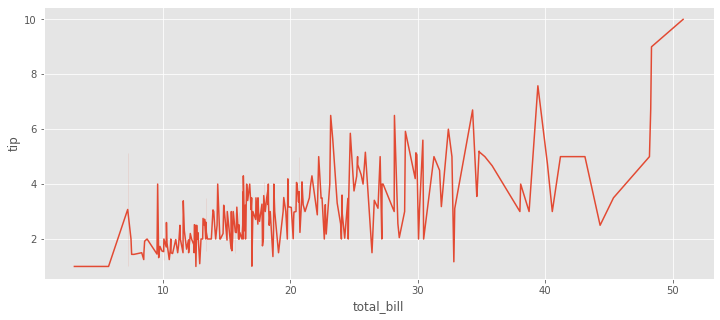

In [2]:
tips = sns.load_dataset("tips")
# 使用 maplotlib 控制图形大小
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=tips, x='total_bill', y='tip', ax=ax)

注意事项：  
1. 这里不能使用 `plt.subplot()`，因为它只返回一个`Axes`对象，不返回`Figure`对象，不能设置`figsize`
2. **不能使用 `sns.relplot`，它是 figure-level 的绘图，不能使用ax参数**

## 绘图风格

官方文档 [Seaborn figure styles](https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles).

一共有5种风格可以使用：
+ darkgrid，默认风格
+ whitegrid
+ dark
+ white
+ ticks

可以通过如下命令设置绘图风格：
```python
sns.set_stype("whitegrid")
```

## 其他

+ 设置标题title  
注意：**seaborn中对于中文标题不支持**

对于Figure-level函数返回的`FaceGrid`对象，可以调用`.fig`获得`Figure`对象，然后设置title

Text(0.5, 0.98, 'Fligths')

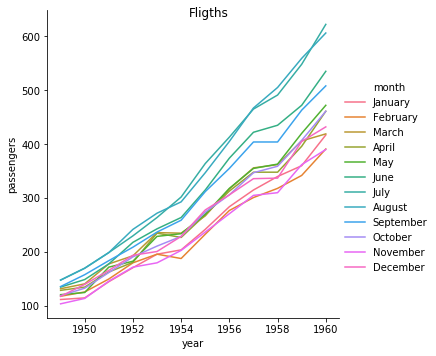

In [21]:
flights = sns.load_dataset("flights")
g = sns.relplot(data=flights,x="year", y="passengers", hue="month", kind='line')
# 设置标题
g.fig.suptitle("Fligths")

对于 Axes-level函数返回的`Axes`对象，可以调用`.set_title()`设置title

Text(0.5, 1.0, 'Flights')

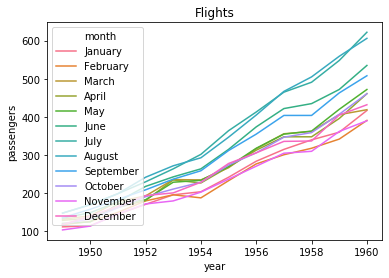

In [23]:
ax = sns.lineplot(data=flights,x="year", y="passengers", hue="month")
ax.set_title('Flights')

---------------

# Seaborn基础

官方文档 [seaborn: statistical data visualization](https://seaborn.pydata.org/).

## Figure-Level 和 Axes-Level 绘图函数

seaborn 的绘图函数分为两个层次，**Figure-level** 和 **Axes-level**，参考官方文档 [Overview of seaborn plotting functions](https://seaborn.pydata.org/tutorial/function_overview.html)：
+ `Figure-Level`
  + 有三个：`relplot`——绘制变量关系；`displot`——绘制变量分布；`catplot`——绘制分类变量。
  + 它们返回的是`FacetGrid`对象——它是对`matplotlib`里`Figure`的封装。  
  + 这类函数都有一个`kind`参数，用来调用 Axes-Level 对应类型的绘图函数。
  


+ `Axes-Level`
  + 这些函数操作的是`matplotlib.pyplot.Axes` 对象，返回的也是该对象。
  + 此类函数不会修改`Axes`之外的内容，可以和matplotlib的其他图形组合在一起。
  + 此类函数默认下会调用`matplotlib.pyplot.gca()`方法获取当前活动的图形句柄，然后在上面绘图，但是也可以**接受一个`ax=`参数，用于在指定的`Axes`上绘图**。


常用的Figure-Level和Axes-Level绘图函数如下.  
注意，**这是 0.11.0(2020 September) 版的**，主要的变化是：
1. 原来可视化分布的 `distplot`函数 --> `displot`（少了t）
2. 新增了`histplot`,`ecdfplot`

![seaborn-function-levels](https://seaborn.pydata.org/_images/function_overview_8_0.png)

## FacetGrid

官方文档 [seaborn.FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid).

在seaborn中，Axes-level的绘图函数返回的都是`matplotlib.axes.Axes`对象，所以直接使用matplotlib里的操作方式对这些图形对象进行设置就行了。  
而Figure-level的绘图函数返回的是一个 `seabornFacetGrid` 对象，熟练的使用seaborn需要对这个对象做一些说明。


`class seaborn.FacetGrid(data, *, row=None, col=None, hue=None, col_wrap=None, sharex=True, sharey=True, height=3, aspect=1, palette=None, row_order=None, col_order=None, hue_order=None, hue_kws=None, dropna=False, legend_out=True, despine=True, margin_titles=False, xlim=None, ylim=None, subplot_kws=None, gridspec_kws=None, size=None)` . 

`FacetGrid`类工作原理如下：
1. 首先使用数据集dataset（long-format）和要使用的变量来初始化一个对象。  
   + 传入的变量被赋值给`row`, `col`, `hue` 这三个参数。  
   + `row`和`col`的取值会决定绘图的Figure的子图布局，比如row=2，col=3，那就会绘制一个 $2\times3$ 的布局子图。
   + 而`hue`会在每个子图里对数据进行分组。  
   + 如果没有传入这些变量，默认不分割子图——这就是"FaceGrid"代表的意思。
2. **每个子图对应于数据的一个子集**，在这些子集上，调用`FaceGrid.map()`或者`FaceGrid.map_dataframe()`方法，用同样的绘图函数进行绘图.
3. 对图形进行细微调整.



绘图方法对比：
+ `FaceGrid.map(self, func, *args, **kwargs)`
  + Apply a plotting function to **each facet’s subset** of the data.
  
+ `FaceGrid.map_dataframe(self, func, *args, **kwargs)`: 
  + Like `.map` but passes args as strings and **inserts data in kwargs**.


`FacetGrid`类的一些方法和属性如下所示，它们对微调图形很有帮助
+ `add_legend()`
+ `set_titles()`，给所有的子图设置title
+ `set_axis_labels()`
+ `set_xlabels()`
+ `set_xticklabels()`
+ `savefig()`

以下是有用的属性
+ `axes`，获取子图的axes对象列表
+ **`fig`，返回整个图形的Figure，拿到这个之后，就可以使用matplotlib里的许多工具对图形做调整了**。

In [23]:
# 数据集
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


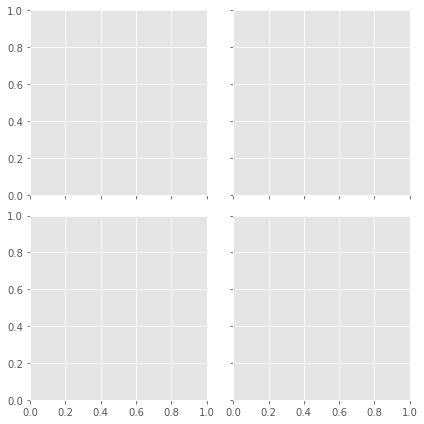

In [29]:
# 1. 按照 time 和 sex 的取值来划分子图
# 2. 设置图形大小采用的参数是 height, aspect, 实际的width = height*aspect. 特别需要注意的是，这里的参数设置的是单个子图的大小，不是整个figure的大小
g = sns.FacetGrid(tips, col="time",  row="sex",  height=3, aspect=1 )

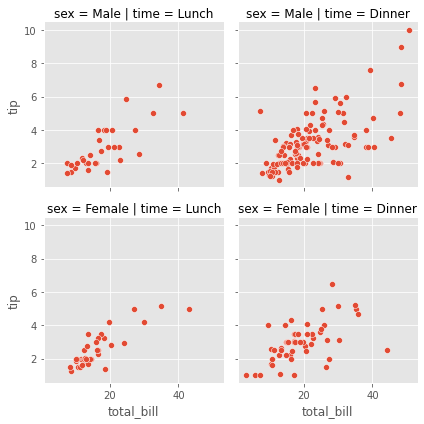

In [25]:
# 在每个子图的数据集上调用同样的绘图函数
# 这里横坐标数值为 total_bill, 纵坐标数值为 tip
g.map(sns.scatterplot, "total_bill", "tip")
g.figure

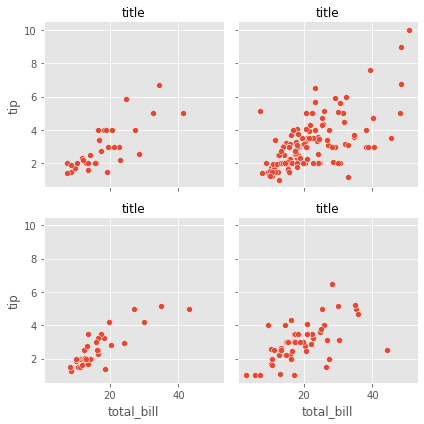

In [26]:
# 调整属性
g.set_titles(template='title')
g.figure

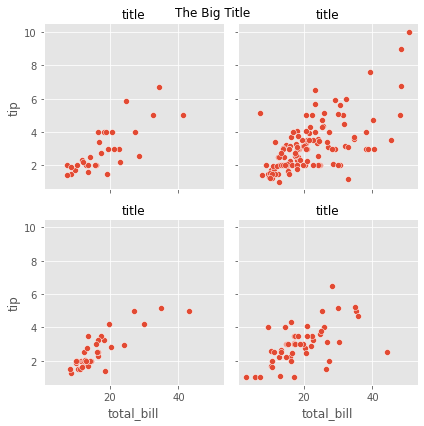

In [27]:
# 最重要的，获取图形的Figure，直接调整属性
# fig 属性后续会被 figure 代替
fig = g.fig
fig.suptitle('The Big Title')
fig

## 绘图的公用参数

seaborn的绘图函数里，公用的一些参数含义如下：
+ `data`: DataFrame
Tidy (**long-form**) dataframe where each column is a variable and each row is an observation.  
注意，DF的格式是long-format.

+ `hue`: name in data, optional  
Grouping variable that will produce elements with **different colors**. Can be either categorical or numeric, although color mapping will behave differently in latter case.

+ `size`: name in data, optional  
Grouping variable that will produce elements with **different sizes**. Can be either categorical or numeric, although size mapping will behave differently in latter case.

+ `style`: name in data, optional  
Grouping variable that will produce elements with **different styles**.  Can have a numeric dtype but will always be treated as categorical.

+ `palette`: string, list, dict, or `matplotlib.colors.Colormap`   
用于指定`hue`进行颜色映射的选择范围，可以是如下方式：
  + str：这时候的值会被传递给 `seaborn.color_palette()` 函数
  + list：比如 `['red', 'blue']`，注意，此时也意味着 `hue` 对应的变量是 categorical 的
  + `matplotlib.colors.Colormap`对象：直接设置颜色映射，注意，此时表明 `hue` 对应的变量是连续的   
.

+ `color`：直接指定颜色的string，大部分函数都可以使用

+ `row, col`: names of variables in data, optional  
Categorical variables that will determine the faceting of the grid.  
用于对数据集进行分割的分类变量。这些变量不同的取值组合划分出来的数据集会在一个单独的子图上绘图。  
这两个参数**只适用于`Figure-Level`的绘图函数。**

+ `height`, `aspect`: 设置图形大小.  
不同于matplotlib，这里没有 width，而是通过 $width=height*aspect$ 间接得到width的值。  
特别要注意的是，这个参数**设置的是每个子图所在Axes的大小**，所以在Figure-level的函数里，需要注意。

# 数据格式

参考官方文档 [Data structures accepted by seaborn](https://seaborn.pydata.org/tutorial/data_structure.html).

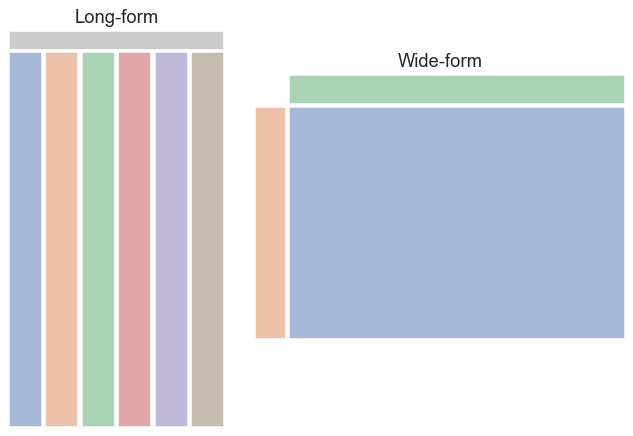

## long-form和wide-form

一般来说，**seaborn能够处理的数据格式是 `long-form` 的**，对于常见的wide-form格式数据，seaborn有一些简单的处理方式

In [30]:
df_long = sns.load_dataset("flights")
df_wide = df_long.pivot(index="year", columns="month", values="passengers")

In [31]:
df_long.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [32]:
df_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


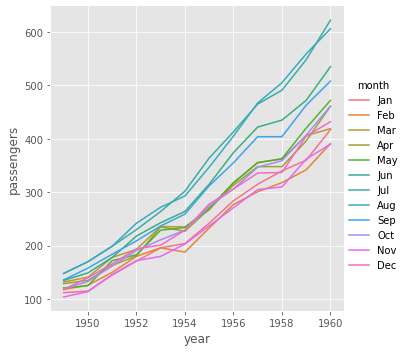

In [33]:
sns.relplot(data=df_long, x="year", y="passengers", hue="month", kind='line')

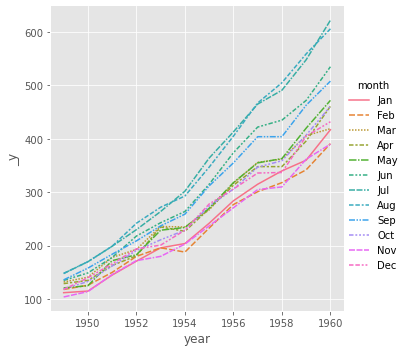

In [34]:
# 这里有点问题
sns.relplot(data=df_wide,  kind='line')

----

# 可视化统计关系-`replot`

官方文档 [Visualizing statistical relationships](https://seaborn.pydata.org/tutorial/relational.html).

顶层绘图函数(**Figure-level**)：`relplot([x, y, hue, size, style, data, row, …])`

有如下两个`Axes-Level`绘图函数：
+ `scatterplot([x, y, hue, style, size, data, …])`  
绘制散点图(`kind="scatter"`，默认)
+ `lineplot([x, y, hue, size, style, data, …])`  
绘制折线图(`kind=line`)

+ 数据结构：不论是散点图还是折线图，展示的都是**两个连续变量**之间的关系，所以要求绘图的变量`x`和`y`都为**连续数值**类型。

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
# styles的选择["white", "dark", "whitegrid", "darkgrid", "ticks"]
# sns.set(style="darkgrid")
from IPython.display import display

## 散点图

In [35]:
tips = sns.load_dataset("tips")
print('tips')
display(tips.head())

tips


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


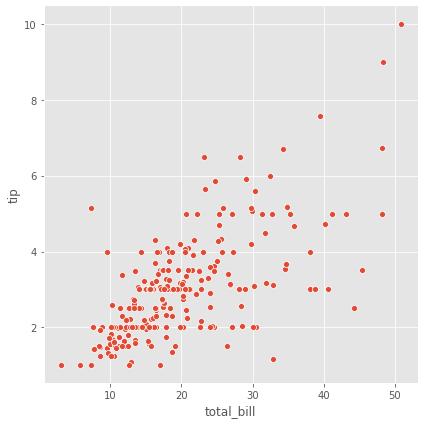

In [26]:
sns.relplot(data=tips, x='total_bill', y='tip', height=6, aspect=1)

+ `hue`参数映射点的颜色

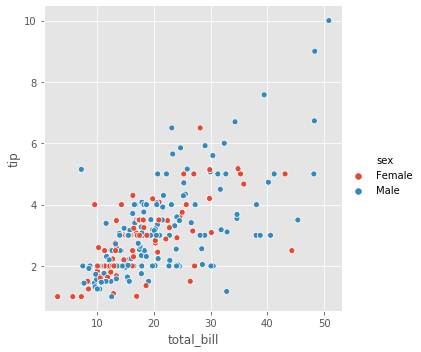

In [11]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='sex')

+ `style`参数映射点的形状

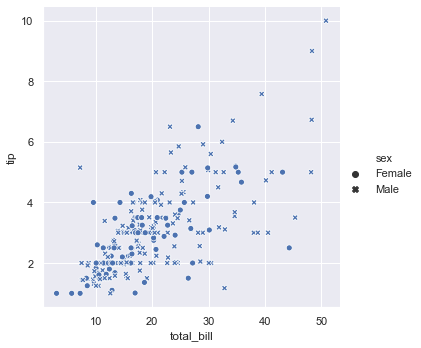

In [12]:
sns.relplot(data=tips, x='total_bill', y='tip', style='sex')

+ `size`参数映射点的大小

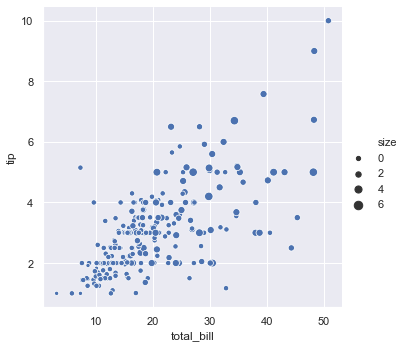

In [14]:
sns.relplot(data=tips, x='total_bill', y='tip', size='size')

+ `row`,`col`参数映射用于分面的变量

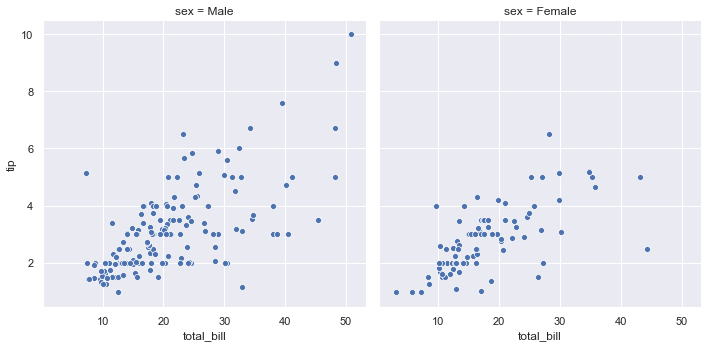

In [15]:
sns.relplot(data=tips, x='total_bill', y='tip', col='sex')

## 线图

**对于line来说，如果data中同一个x对应多个y值，会自动绘制均值的折线图，并绘制95%的置信区间。**

In [36]:
fmri = sns.load_dataset("fmri")
print('fmri')
display(fmri.head())

fmri


,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


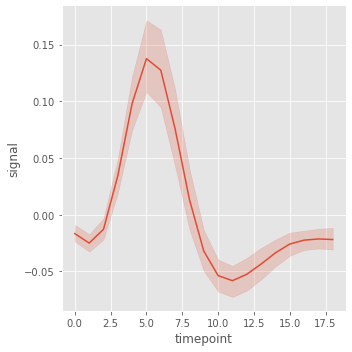

In [37]:
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line')

+ 分组绘制线

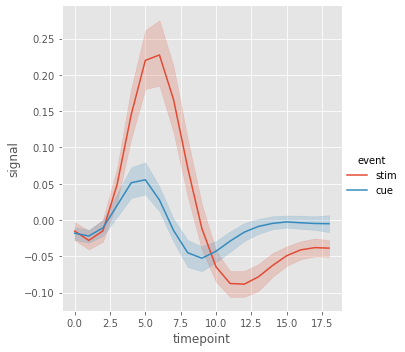

In [38]:
sns.relplot(data=fmri, x='timepoint', y='signal', hue='event', kind='line')

-------

# 可视化分类变量-`catplot`

官方文档 [Plotting with categorical data](https://seaborn.pydata.org/tutorial/categorical.html).

用于绘制分类变量之间的关系，只要有一个变量是分类变量即可。

顶层绘图函数(**Figure-level**): `catplot([x, y, hue, data, row, col, …])`

按照绘制图形的不同，`Axes-Level`绘图函数又分为三类：
+ 分类散点图
  + `stripplot()`: (`kind="strip"`; the default)
  + `swarmplot()`: (`kind="swarm"`)
+ 分布图
  + `boxplot()`: 箱线图(`kind="box"`)
  + `violinplot()`: 小提琴图(`kind="violin"`)
  + `boxenplot()`: (`kind="boxen"`)
+ 估计图
  + `pointplot()`: (`kind="point"`)
  + `barplot()`: 条形图(`kind="bar"`)
  + `countplot()`: 频数直方图(`kind="count"`)
  
注意
> 虽然这里是做的**分类变量 vs 连续变量**的**双变量分析**，但是上面的这些函数也可以用于**连续变量的单变量分析**——只传入一个连续特征，此时分类特征默认只有一个.

## 分类散点图

绘图的数据结构：
> 一个变量是**分类**特征，另一个是**连续**特征。  
> 绘制的是在分类特征的**每个类别里连续特征是如何分布的**，用于**分析分类特征的不同类别取值对于连续特征的分布影响**。

主要有如下两个函数
+ `stripplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, jitter=True, dodge=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, hue_norm=None, native_scale=False, formatter=None, legend='auto', ax=None, **kwargs)`  
  + Draw a scatterplot where **one variable is categorical**. (`kind=strip`，默认)  
  + `jitter`：是否随机散开点
  + `orient`：`v`（垂直绘制） 或者 `h`（水平绘制），这个参数显得有点多余，因为可以通过交换x,y的值来实现   
.

+ `swarmplot([x, y, hue, data, order, …])`  
  + Draw a categorical scatterplot with **non-overlapping** points，(`kind=swarm`) .     
  + 采用特殊的算法分散点，**不适用于大数据集**，数据规模太大的话，会有一些点无法放置在图中。
  

> 个人感觉，这里的**分类散点图的不如下面的箱线图和小提琴图好用**。

Text(0.5, 1.0, 'Swarmplot with x,y exchanged')

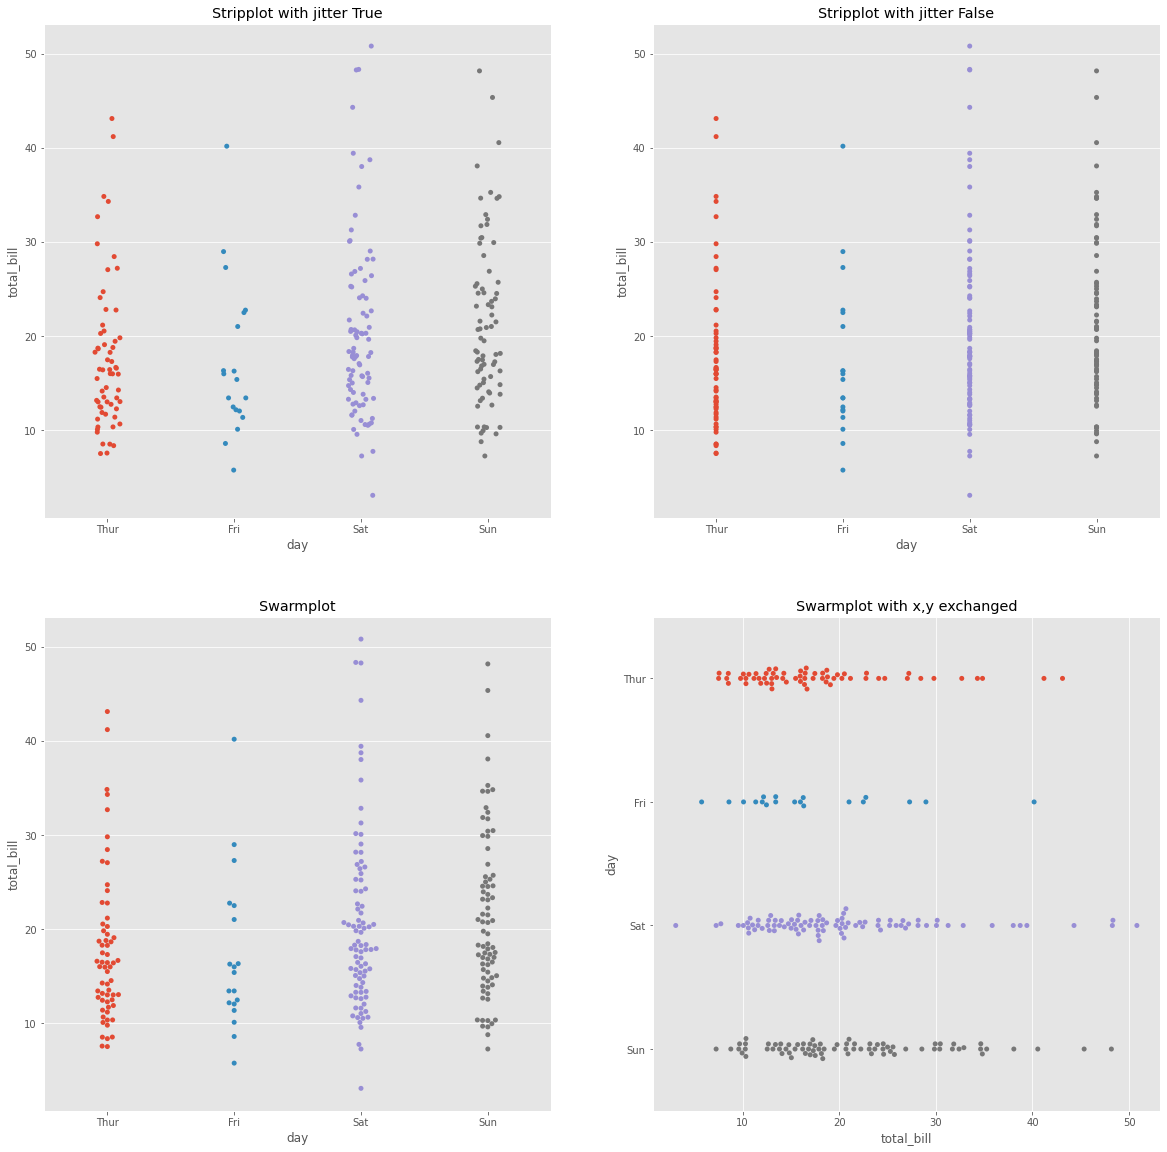

In [40]:
# 绘制 4x4 的子图布局
fig, axes = plt.subplots(2,2, figsize=(20,20))

# 1，2号图是 stripplot, 区别只是 jitter 参数是否打开
sns.stripplot(data=tips, x='day', y='total_bill', ax=axes[0,0])
sns.stripplot(data=tips, x='day', y='total_bill', jitter=False, ax=axes[0,1])

# 3号图是 swarmplot
sns.swarmplot(data=tips, x="day", y="total_bill", ax=axes[1,0])

# 4号图交换横纵坐标
sns.swarmplot(data=tips, y="day", x="total_bill", ax=axes[1,1])

axes[0,0].set_title('Stripplot with jitter True')
axes[0,1].set_title('Stripplot with jitter False')
axes[1,0].set_title('Swarmplot')
axes[1,1].set_title('Swarmplot with x,y exchanged')

## 分布对比图（分组箱线图）   

绘图的数据结构：
> 一个变量是**分类**特征，另一个是**连续**特征。  
> 用于描述**连续特征在分类特征内每个取值上的分布**。


有如下三个绘图函数：
+ `boxplot([x, y, hue, data, order, hue_order, …])` 箱线图(`kind=box`)

+ `boxenplot([x, y, hue, data, order, …])` 多阶梯箱线图，**适合大数据集**(`kind=boxen`)

+ `violinplot([x, y, hue, data, order, …])` 小提琴图，箱线图与核密度估计图的结合(`kind=violin`)

In [41]:
# 数据集
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Text(0.5, 1.0, 'Violinplot')

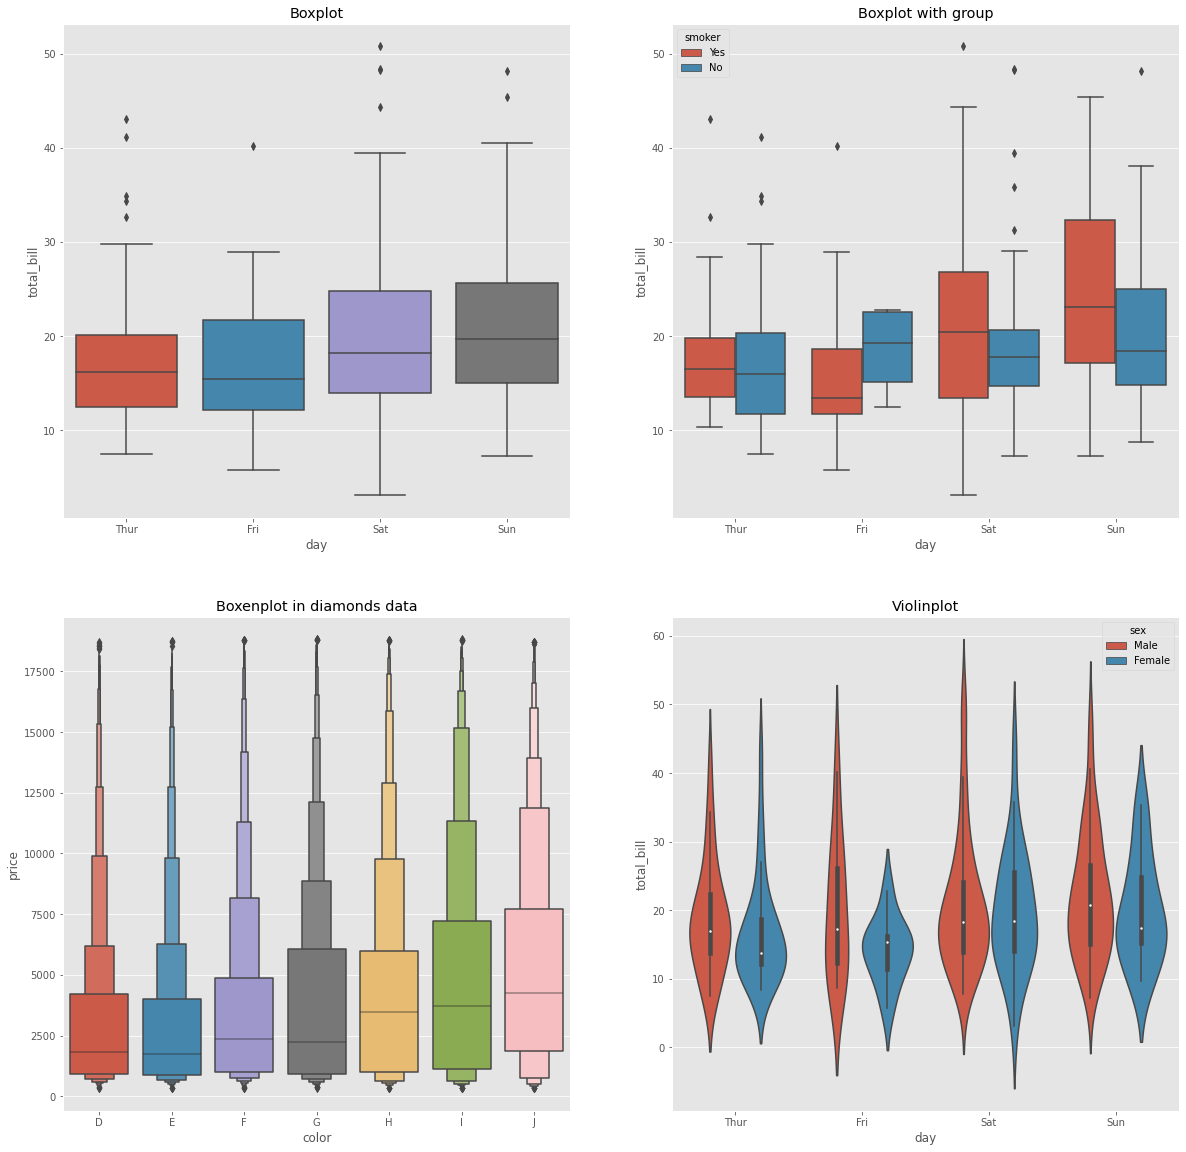

In [42]:
# 绘制 2x2 的子图布局
fig, axes = plt.subplots(2,2, figsize=(20,20))

# 普通箱线图
sns.boxplot(data=tips, x="day", y="total_bill", ax=axes[0,0])
# # 分组箱线图
sns.boxplot(data=tips, x="day", y="total_bill", hue="smoker", ax=axes[0,1])
# # 多阶梯箱线图
sns.boxenplot(data=diamonds.sort_values("color"), x="color", y="price", ax=axes[1,0])
# # 小提琴图
sns.violinplot(data=tips, x="day", y="total_bill", hue="sex", ax=axes[1,1])

axes[0,0].set_title('Boxplot')
axes[0,1].set_title('Boxplot with group')
axes[1,0].set_title('Boxenplot in diamonds data')
axes[1,1].set_title('Violinplot')

## 估计图（分组条形图）  

Categorical **estimate** plots. 

绘图的数据结构：
> 一个变量是**分类**特征，另一个是**连续**特征。

有如下三个绘图函数：

+ `barplot([x, y, hue, data, order, hue_order, …])` 
  + Show point estimates and **confidence intervals** as rectangular bars，(`kind=bar`)
  + 注意，这个绘制的不是传统意义的条形图，它绘制是**按照一个分类变量分组后，将另一个连续变量在每组内的均值做为条形图的高度**
  + `order`,`hue_order`：list of str，用于指定绘制的level顺序
  + `ci`: float 、'sd' 或者 None. 用于指定置信区间的大小.
  + `orient`: 'v' 或者 'h'，绘图方向



+ `countplot(*[, x, y, hue, data, order, …])` —— **频数**条形图   
  + Show the counts of observations in each categorical bin using bars. (`kind=count`)
  + 这个才是绘制传统意义上的条形图，**每个条形对应于分类变量的一个取值，条形图高度=取值个数**
  + 它**只需要指定一个分类变量**即可，会**自动统计该分类变量不同取值的个数**
  + 指定`x`，绘制的是**竖直**条形图，指定`y`，绘制的是**水平**条形图，但是**不能同时指定`x`和`y`**
  + `hue`会被作为分组条形图的分组变量。



+ `pointplot([x, y, hue, data, order, …])` —— 这个图不知道是啥意思。。。   
  + Show point estimates and confidence intervals using scatter plot glyphs，(`kind=point`)

In [7]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Text(0.5, 1.0, 'Pointplot ???')

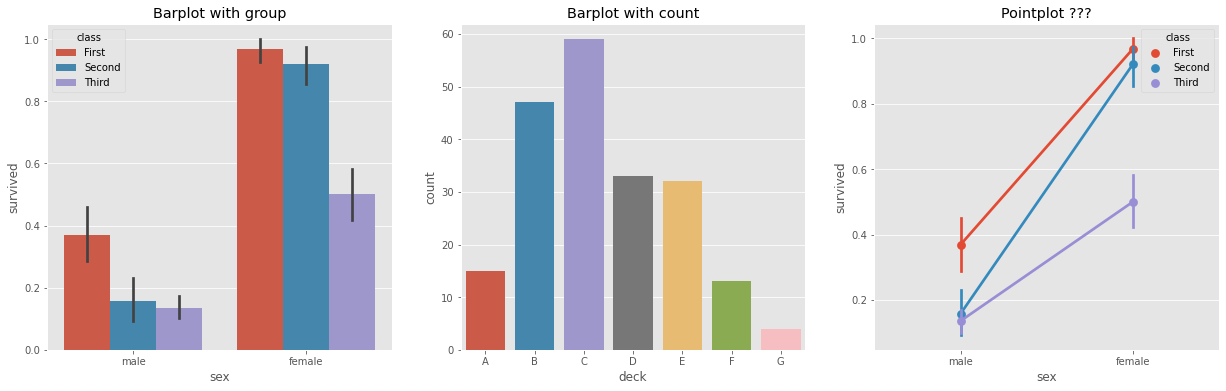

In [8]:
fig, axes = plt.subplots(1,3, figsize=(21,6))

# 注意，下面这个绘制的是按照 sex 分组，survived在每组内的均值
sns.barplot(data=titanic, x="sex", y="survived", hue="class", ax=axes[0])

# 这个才是绘制条形图，它只需要一个变量即可绘制，会自动统计其中各个取值的个数
sns.countplot(data=titanic, x="deck", ax=axes[1])

# 
sns.pointplot(data=titanic, x="sex", y="survived", hue="class", ax=axes[2])

axes[0].set_title('Barplot with group')
axes[1].set_title('Barplot with count')
axes[2].set_title('Pointplot ???')

上面`barplot`绘制的是每组的均值，带有的竖线表示的是该组均值的置信区间，或者标准差。

作为对比，可以看一下使用`catplot`绘制时的情况，这里用了`col`参数来分割数据集（只适用于`Figure-Level`函数）

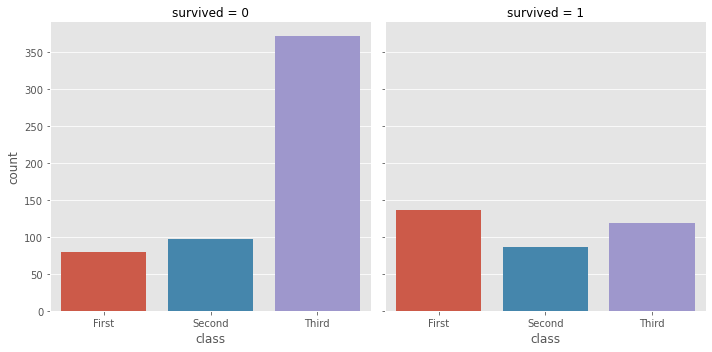

In [22]:
sns.catplot(data=titanic, x='class', col='survived', kind='count')

----------

# 可视化数据集分布

官方文档 [Visualizing the distribution of a dataset](https://seaborn.pydata.org/tutorial/distributions.html)，用于可视化数据集的分布，这部分的绘图函数**最适合做EDA**。

Axes-Level绘图函数有如下几个：
+ `hisplot()`：直方图
+ `kdeplot()`
+ `rugplot()`
+ `ecdfplot()`

顶层绘图函数(**Figure-Level**)有三个：
+ `displot()`
+ `joinplot()`
+ `pairplot()`

## 单变量分布（直方图）

可以使用`displot()`或者`histplot([data, x, y, hue, weights, stat, …])`——Plot univariate or bivariate histograms to show distributions of datasets.
+ `stat`，指定每箱中的统计量，有如下四种：
  + 'count'，频数直方图
  + 'frequency'，频率直方图
  + 'density'，normalizes counts so that the area of the histogram is 1
  + 'probability'，normalizes counts so that the sum of the bar heights is 1
+ `bins`，str, number, vector, or a pair of such values
+ `kde`，bool，是否绘制核密度图

In [9]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

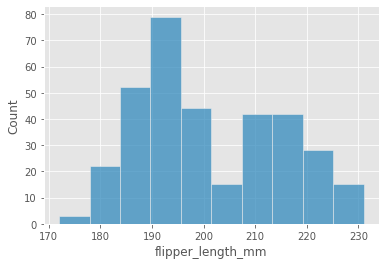

In [10]:
sns.histplot(data=penguins, x="flipper_length_mm")

可以使用`kde=False`来绘制单纯的直方图。  
下图中，打开了`rug`参数，坐标轴附件的竖线就是所谓的Rug图——它也可以使用`rugplot()`函数单独绘制

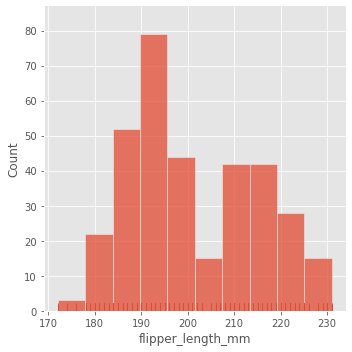

In [11]:
sns.displot(data=penguins, x="flipper_length_mm", kde=False, rug=True)

绘制直方图时指定bins

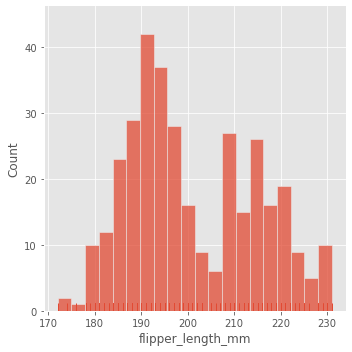

In [12]:
sns.displot(data=penguins, x="flipper_length_mm", kde=False, rug=True, bins=20)

+ 绘制核密度图，只要关闭`hist`参数就行

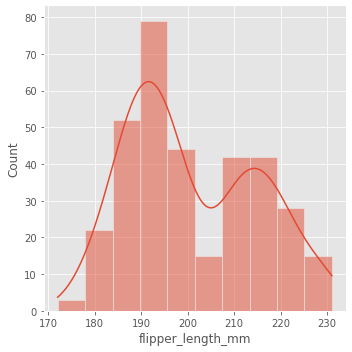

In [14]:
sns.displot(data=penguins, x="flipper_length_mm", kde=True)

+ 也可以绘制条件直方图

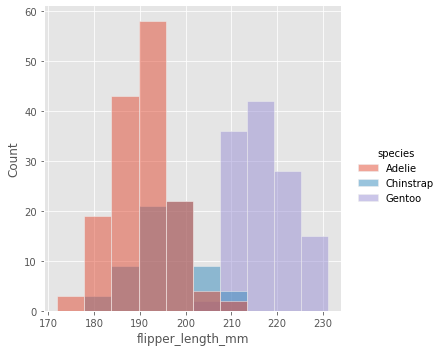

In [15]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

+ 使用fit参数来绘制根据数据拟合的分布

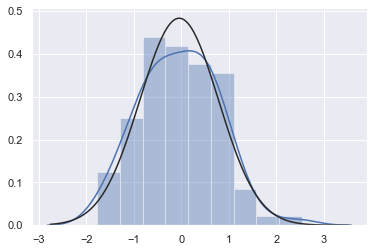

In [6]:
from scipy.stats import norm

sns.distplot(x, kde=True, fit=norm)

上面也可以直接使用`kdeplot`绘制。  
直接使用`kdeplot`的话，可以提供更加精细的控制。

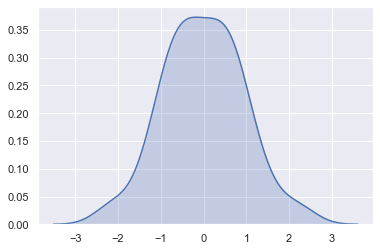

In [47]:
sns.kdeplot(x, shade=True)

## 二元变量的联合分布

`jointplot(x, y[, data, kind, stat_func, …])` Draw a plot of two variables with **bivariate** and **univariate** graphs.

常用参数有：
+ `x, y`:strings or vectors
Data or names of variables in data.
+ `data`:DataFrame, optional
DataFrame when x and y are variable names.
+ `kind`:{ “scatter” | “reg” | “resid” | “kde” | “hex” }, optional
Kind of plot to draw.

+ `stat_fun`:ccallable or None, optional
Deprecated

+ `color`:matplotlib color, optional
Color used for the plot elements.

In [50]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

`jointplot`默认下会绘制`kind=scatter`类型的图——此时调用了`scatterplot()`函数。

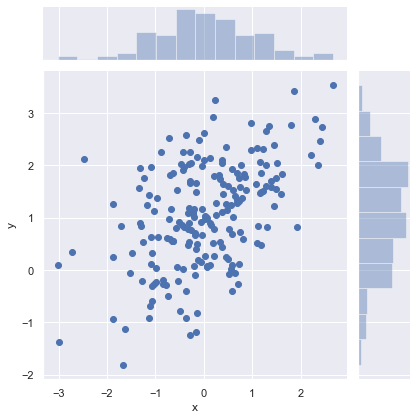

In [53]:
sns.jointplot(x="x", y="y", data=df)

绘制两变量的联合核密度图

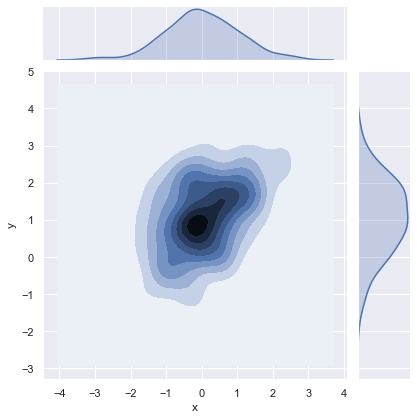

In [54]:
sns.jointplot(x="x", y="y", data=df, kind='kde')

也可以调用`kdeplot`函数来绘制

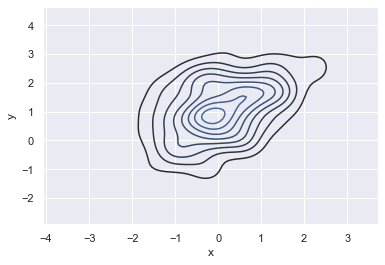

In [55]:
sns.kdeplot(df.x, df.y)

## 探索数据集中成对变量间的关系

`pairplot(data[, hue, hue_order, palette, …])` Plot **pairwise relationships** in a dataset.

In [52]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


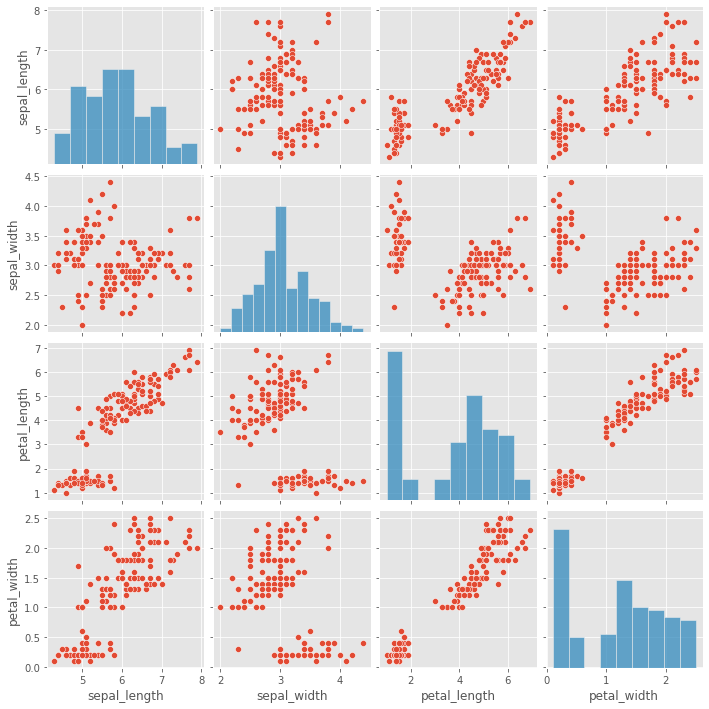

In [53]:
sns.pairplot(iris)

指定分割变量`hue`，直接绘制iris中三种类型的花瓣的变量间的关系

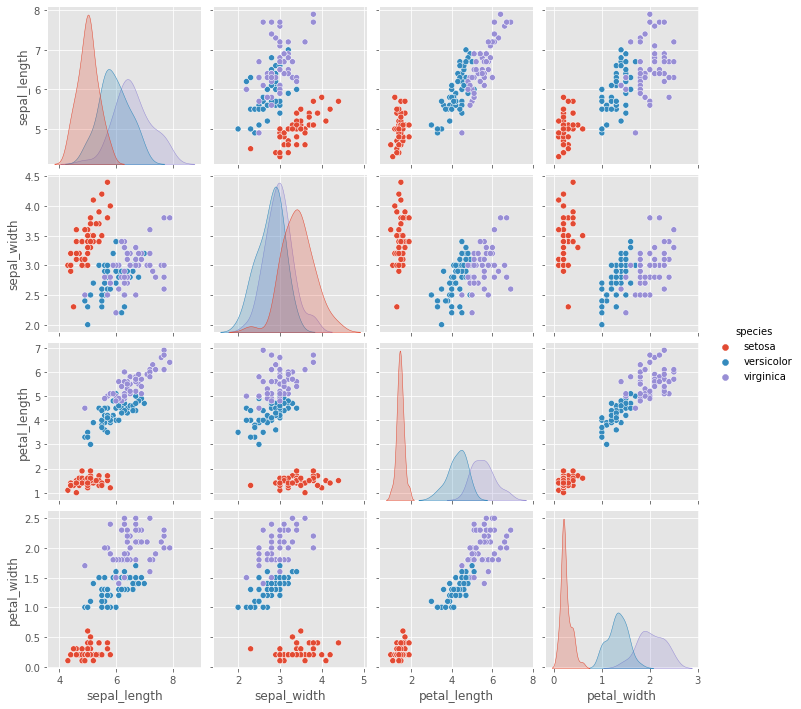

In [54]:
sns.pairplot(iris, hue="species")

## 其他

下面的这两个函数可以单独使用，但是它们已经被包含在上面那几个函数的参数中了。

+ `kdeplot(data[, data2, shade, vertical, …])` Fit and plot a **univariate** or **bivariate** kernel density estimate.

+ `rugplot(a[, height, axis, ax])` Plot datapoints in an array as sticks on an axis.

---

# 可视化线性模型

官方文档 [Visualizing regression models](https://seaborn.pydata.org/tutorial/regression.html).

+ `regplot(x, y[, data, x_estimator, x_bins, …])`——Axes-level  
Plot data and a linear regression model fit.

+ `lmplot(x, y, data[, hue, col, row, palette, …])`——Figure-level  
Plot data and regression model fits across a FacetGrid.

+ `residplot(x, y[, data, lowess, x_partial, …])`  
Plot the residuals of a linear regression——绘制残差图。

**`lmplot()`比`regplot()`的功能更多，它能根据分组变量绘制多条回归线** 。  
实际上，`lmplot()`是对`regplot()`和`FacetGrid`进行了封装，这也意味着`regplot()`是一个**axes-level**的绘图API。

# 其他有用的绘图函数

## 热力图

`headmap(data, vmin=None, vmax=None, cmap=None, center=None,...)`

In [65]:
uniform_data = pd.DataFrame(np.random.rand(4, 5))

In [66]:
uniform_data

,0,1,2,3,4
0,0.520713,0.534483,0.585389,0.036005,0.183887
1,0.047489,0.261476,0.167109,0.093047,0.363081
2,0.111175,0.680854,0.274436,0.018009,0.571864
3,0.568148,0.421419,0.841750,0.971563,0.829060


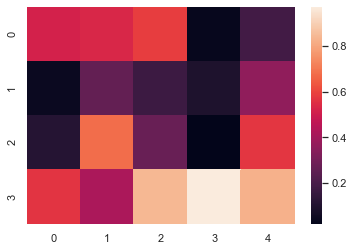

In [67]:
sns.heatmap(uniform_data)

-------------